In [2]:
import numpy as np
import matplotlib.pyplot as plt
'''
  Resuelve 
  Y' = F(x,Y)
  y retorna discretización de Y
'''
def RK4(f,a,b,n,x0,dim):
  u = np.zeros((n+1,dim),float)
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n+1)])
  u[0]=x0
  for i in range(n):
    K1 = f(t[i],u[i])
    K2 = f(t[i]+h/2,u[i]+K1*h/2)
    K3 = f(t[i]+h/2,u[i]+K2*h/2)
    K4 = f(t[i]+h,u[i]+h*K3)
    u[i+1]= u[i] + (h/6)*(K1+2*K2+2*K3+K4)
  return u

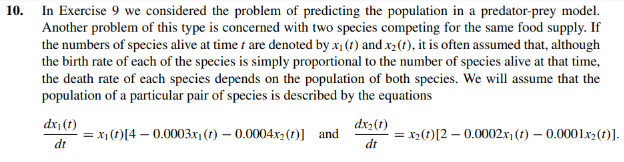

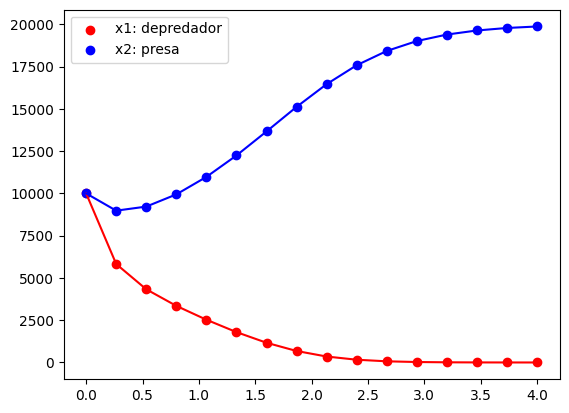

In [13]:
f = lambda t,x: np.array([
    x[0]*(4-0.0003*x[0] - 0.0004*x[1]),
    x[1]*(2-0.0002*x[0]-0.0001*x[1])
])
'''
    x1 : depredadores
    x2 : presa
'''

x10 = 1e4
x20 = 1e4
a = 0
b = 4
n = 15
x0 = np.array([x10,x20])
x1 = np.transpose(RK4(f,a,b,n,x0,2))[0]
x2 = np.transpose(RK4(f,a,b,n,x0,2))[1]
h = (b-a)/n
t = np.array([a+i*h for i in range(n+1)])
plt.scatter(t,x1, c = 'red')
plt.scatter(t,x2, c = 'blue')
plt.plot(t,x1, c = 'red')
plt.plot(t,x2, c = 'blue')
plt.legend(["x1: depredador","x2: presa"])

In [4]:
'''
    MÉTODO PARA EDO'S LINEALES:
    disparo() retorna una discretización del problema 
    y'' = py' + qy + r, en [a,b]
    con y(a)= alfa y y(b)=beta
'''

def disparo(p,q,r,a,alfa,b,beta,n):
  f = lambda x,z: np.array([z[1],
                            q(x)*z[0]+p(x)*z[1]+r(x),
                            z[3],
                            q(x)*z[2]+p(x)*z[3]+r(x)])
  z0 = np.array([alfa,0,0,1])
  Z = RK4(f,a,b,n,z0,4)
  y1 = np.transpose(Z)[0]
  y2 = np.transpose(Z)[2]
  Y = y1 + ((beta - y1[n])/y2[n])*y2
  return Y

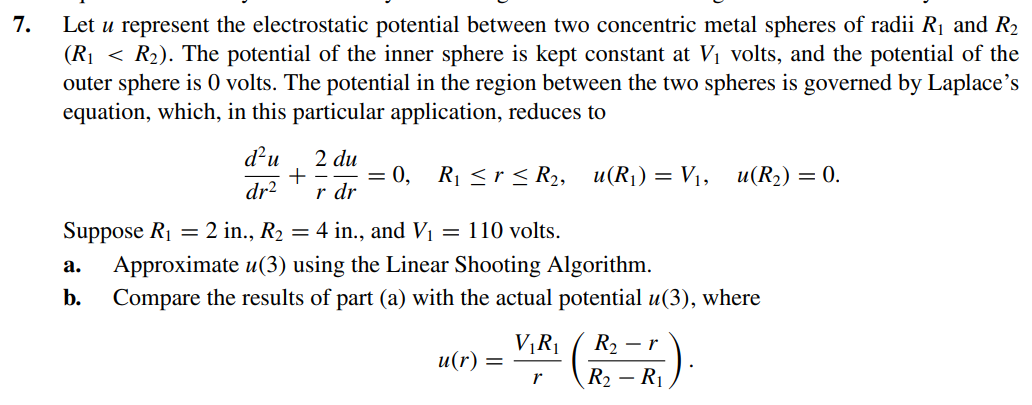

valor aproximado en r= 3.0 es:  36.667015126444795
valor exacto en r= 3 es:  36.666666666666664


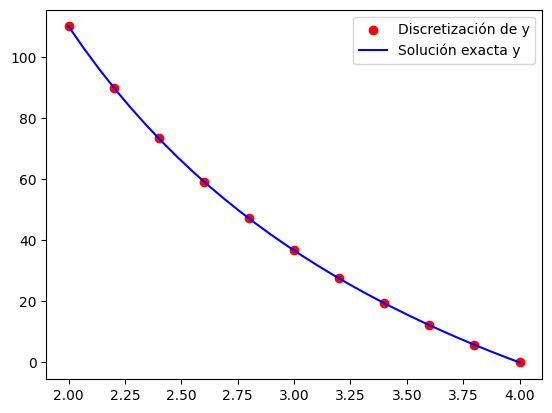

In [5]:
p = lambda x: -2/x
q = lambda x: 0
r = lambda x: 0
R1 = 2
V1 = 110
R2 = 4
V2 = 0
n = 10
U = disparo(p,q,r,R1,V1,R2,V2,n)
h = (R2-R1)/n
t = np.array([R1+i*h for i in range(n+1)])
plt.scatter(t,U, c = 'red')

#VERIFICANDO CON SOLUCIÓN EXACTA:
g = lambda x: ((V1*R1)*(R2-x))/((x)*(R2-R1))
X = np.linspace(R1,R2,30)
plt.plot(X,g(X), c = 'blue')
plt.legend(["Discretización de y","Solución exacta y"])
print("valor aproximado en r=", t[5], "es: ", U[5])
print("valor exacto en r= 3 es: ", g(3))